In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter


0        0
1        0
2        0
3        0
4        0
        ..
5016    99
5017     0
5018     0
5019     0
5020     0
Name: depth_value, Length: 5021, dtype: int64


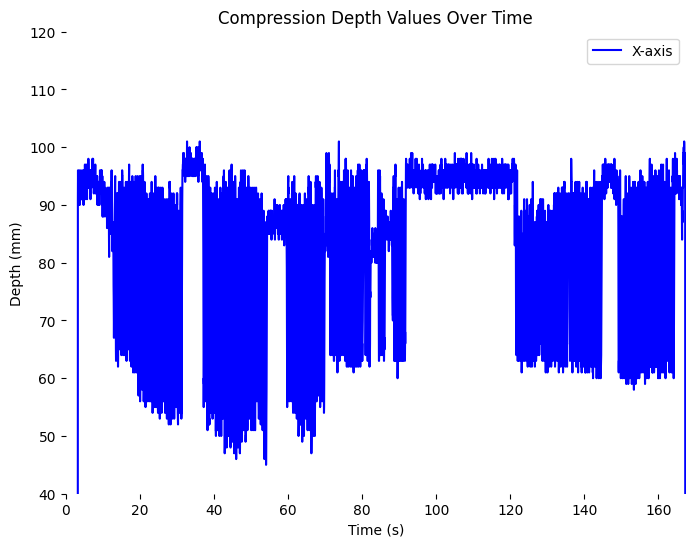

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


depth_sensor_data = "/standard/storage/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/0/distance_sensor_data/sync_depth_sensor.csv"
# Load your data
data = pd.read_csv(depth_sensor_data, index_col=False)  # Make sure to adjust the path if needed
x_values = data['depth_value']

print(x_values)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, len(x_values) / 30)  # Time in seconds on the x-axis
ax.set_ylim(40, 120)  # Depth values on the y-axis
ax.set_title('Compression Depth Values Over Time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Depth (mm)')

# Initialize lines for each axis
line_x, = ax.plot([], [], label='X-axis', color='b')

# remove lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend()

# Initialize animation
def init():
    line_x.set_data([], [])
    return [line_x]

# Update function for each frame
def animate(i):
    # Time sequence based on 30Hz frame rate
    t = np.linspace(0, i / 30, i + 1)
    line_x.set_data(t, x_values[:i + 1])
    return [line_x]

# Create and save animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_values), interval=1000/30, blit=True)
ani.save('./output/visualized_video/ng2_t0_depth_sensor.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


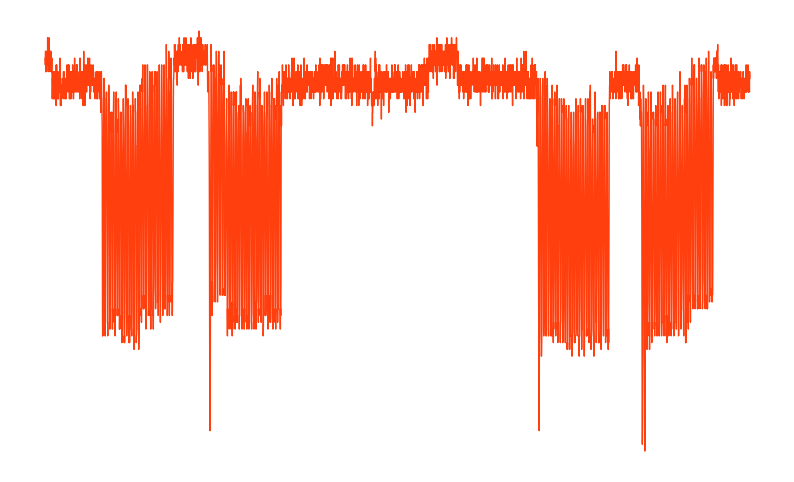

In [29]:
# Load the CSV file
file_path = '../../TestData/06-09-2024/debrah/cardiac_arrest/2/distance_sensor_data/sync_depth_sensor.csv'  # Update this with your file path
depth_sensor = pd.read_csv(file_path)


# Set the Seaborn style
# Set the Seaborn style and color palette
sns.set(style="white")

# Create the plot with Seaborn and enhance the aesthetics
plt.figure(figsize=(10, 6))

data_to_plot = depth_sensor[['depth_value']].iloc[150:, :]
sns.lineplot(x=data_to_plot.index, y=data_to_plot['depth_value'], 
             dashes=False, linewidth=1, color='#ff3f0e')  # Now properly orange

# Remove axes, labels, and titles
plt.legend([], [], frameon=False)
plt.axis('off')

# Save the plot with a transparent background
plt.savefig('./figures/depthsensor_plot_seaborn.png', transparent=True, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()

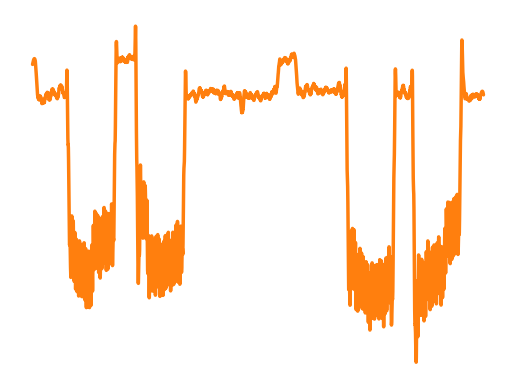

In [32]:
data_to_plot = depth_sensor[['depth_value']].iloc[150:, :]
smoothed_data = savgol_filter(data_to_plot['depth_value'], window_length=51, polyorder=3)

# Explicitly specify x and y for the smoothed data, with orange color
sns.lineplot(x=data_to_plot.index, y=smoothed_data, dashes=False, linewidth=2.5, color='#ff7f0e')  # Now smoother and orange

# Remove axes, labels, and titles
plt.legend([], [], frameon=False)
plt.axis('off')

# Save the plot with a transparent background
plt.savefig('./figures/depthsensor_plot_seaborn_smooth_orange.png', transparent=True, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()